## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [5]:
import pandas as pd
import seaborn as sns


In [6]:
hostels = pd.read_csv('../data/hostel.csv')
penguins = sns.load_dataset("penguins")
hostels = hostels.dropna()

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    return (predictions == actuals).sum() / len(actuals)

In [10]:
hostels.head(3)

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716


In [7]:
hostels_train, hostels_test = train_test_split(hostels, test_size=0.3, stratify=hostels['City'], random_state=3)
print(hostels_train.shape, hostels_test.shape)

(208, 16) (90, 16)


In [12]:
features= ['summary.score']
dt_classification = DecisionTreeClassifier(max_depth = 3)
dt_classification.fit(hostels_train[features], hostels_train['City'])

DecisionTreeClassifier(max_depth=3)

It isn't too surprising the accuracy isn't that high as there aren't a lot of samples in the used dataset. However the test set surprisingly scores close to the training set.

In [13]:
predictionsOnTrainset = dt_classification.predict(hostels_train[features])
predictionsOnTestset = dt_classification.predict(hostels_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, hostels_train.City)
accuracyTest = calculate_accuracy(predictionsOnTestset, hostels_test.City)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.49038461538461536
Accuracy on test set 0.4222222222222222


In [15]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

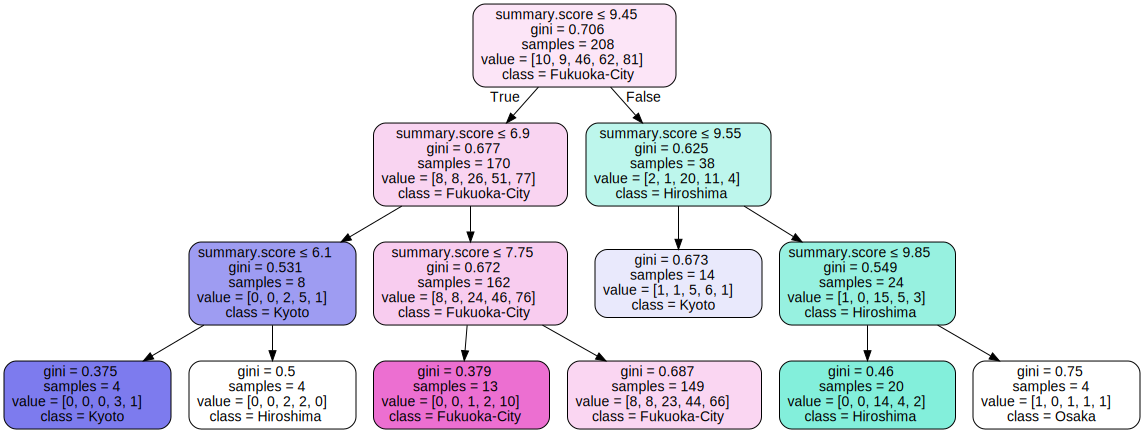

In [17]:
plot_tree_classification(dt_classification, features, hostels.City.unique())
